# Load PlayStation sales data from Kaggle dataset
# Dataset contains PS3, PS4, PS5 game sales across regions

THE SCOPE OF THIS PERSONAL PROJECT IS TO CREATE A DATA PIPELINE

LOAD -> EXPLORE -> CLEAN -> TRANSFROM -> ANALYZE -> VISUALIZE

1) LOAD THE DATA

In [1071]:
import pandas as pd
import sqlite3
import logging
import matplotlib.pyplot as plt
import numpy as np
import os 
# Create outputs folder if doesn't exist
if not os.path.exists('outputs'):
    os.makedirs('outputs')
    print("DONE! Created 'outputs/' folder for visualizations")

In [1072]:

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

In [1073]:
logger.info("STARTING THE PIPELINE")
logger.info("-"*20)

INFO:__main__:STARTING THE PIPELINE
INFO:__main__:--------------------


In [1074]:

logger.info("Loading data from CSV")
input_file ="PlayStation Sales and Metadata (PS3PS4PS5) (Oct 2025).csv"
try:
    df_playstation_raw = pd.read_csv(input_file)
    logger.info("SUCCES! Loading data from CSV")
    logger.info(f"The DataFrame contains {len(df_playstation_raw)} rows and {len(df_playstation_raw.columns)} columns")
    
except FileNotFoundError:
    logger.error("The file doesn't exist")


INFO:__main__:Loading data from CSV
INFO:__main__:SUCCES! Loading data from CSV
INFO:__main__:The DataFrame contains 4963 rows and 18 columns


In [1075]:
logger.info("Loading data for a comparison df")
df_playstation_raw_initial = pd.read_csv(input_file)
logger.info("Done! loading data for a comparison df")

INFO:__main__:Loading data for a comparison df
INFO:__main__:Done! loading data for a comparison df


UNDERSTANDING THE DATA

In [1076]:
df_playstation_raw.describe()

,Total Shipped,Total Sales,NA Sales,PAL Sales,Japan Sales,Other Sales,rating,ratings_count,metacritic
count,4.963000e+03,4.963000e+03,4.963000e+03,4.963000e+03,4.963000e+03,4.963000e+03,2847.000000,2847.000000,1530.000000
mean,9.352005e+04,3.008906e+05,1.178199e+05,1.170482e+05,2.178723e+04,4.426154e+04,2.762455,269.917106,73.826144
std,8.977504e+05,1.055158e+06,4.052999e+05,4.946509e+05,8.250273e+04,1.639967e+05,1.531923,618.110338,11.532527
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,21.000000
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000,8.000000,68.000000
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.380000,44.000000,76.000000
75%,0.000000e+00,1.600000e+05,7.000000e+04,3.000000e+04,0.000000e+00,2.000000e+04,3.830000,205.500000,82.000000
max,2.269000e+07,2.032000e+07,6.370000e+06,9.850000e+06,2.170000e+06,3.120000e+06,4.760000,7225.000000,97.000000


In [1077]:
df_playstation_raw.dtypes

Game              object
Console           object
Name              object
Publisher         object
Developer         object
Total Shipped    float64
Total Sales      float64
NA Sales         float64
PAL Sales        float64
Japan Sales      float64
Other Sales      float64
Release Date      object
Last Update       object
rating           float64
ratings_count    float64
metacritic       float64
genres            object
platforms         object
dtype: object

I SAW THAT RELEASE DATE WAS AN OBJECT, SO FIRST THINK FIRST I CHANGE THAT IN A DATE TIME TYPE SO WE CAN USE IT MOREA EASILY IF WE WANT TO DO SOME ANALYZES ON DATES

In [1078]:

logger.info("Converting 'Release Date' column to date")
df_playstation_raw["Release Date"] = pd.to_datetime(df_playstation_raw['Release Date'], errors='coerce')
logger.info("Done! Converting 'Release Date' column to date")

INFO:__main__:Converting 'Release Date' column to date
INFO:__main__:Done! Converting 'Release Date' column to date


In [1079]:
logger.info("Creating Year and Month features and transforming them into 'int'")
df_playstation_raw["Release Year"] = df_playstation_raw["Release Date"].dt.year.astype('Int64')
df_playstation_raw["Release Month"] = df_playstation_raw["Release Date"].dt.month.astype('Int64')
logger.info("Done! Creating Year and Month features and transforming them into 'int'")


INFO:__main__:Creating Year and Month features and transforming them into 'int'
INFO:__main__:Done! Creating Year and Month features and transforming them into 'int'


NOW I'VE SEPARATED THE MONTHS AND YEAR AS FEATURES. IT WILL BE FASTER TO ACCES THOSE DATA WHEN WE ARE DOING DATA EXPLORATION

FINDING DATA THAT IS NULL, 0 or NaN

In [1080]:
df_playstation_raw.isnull().sum()

Game                0
Console             0
Name                0
Publisher           0
Developer           0
Total Shipped       0
Total Sales         0
NA Sales            0
PAL Sales           0
Japan Sales         0
Other Sales         0
Release Date     1437
Last Update      2162
rating           2116
ratings_count    2116
metacritic       3433
genres           2160
platforms        2116
Release Year     1437
Release Month    1437
dtype: int64

In [1081]:
logger.info("Visualization of first and last game for each console")
described_data_console = df_playstation_raw.groupby('Console').describe() 
df_years_on_console = pd.DataFrame(columns=["First game", "Last game"])
df_years_on_console["First game"] = described_data_console["Release Year"]["min"]
df_years_on_console["Last game"] = described_data_console["Release Year"]["max"]
logger.info("Done! Visualization of first and last game for each console")
df_years_on_console

INFO:__main__:Visualization of first and last game for each console
INFO:__main__:Done! Visualization of first and last game for each console


,First game,Last game
Console,,
PS3,2006.0,2020.0
PS4,2013.0,2023.0
PS5,2015.0,2026.0


We can see that for PS3 we had games made between 2006 and 2020, for PS4 between 2013 and 2023 and for PS5 from 2015 until today

In [1082]:
df_playstation_raw.isnull().sum()

Game                0
Console             0
Name                0
Publisher           0
Developer           0
Total Shipped       0
Total Sales         0
NA Sales            0
PAL Sales           0
Japan Sales         0
Other Sales         0
Release Date     1437
Last Update      2162
rating           2116
ratings_count    2116
metacritic       3433
genres           2160
platforms        2116
Release Year     1437
Release Month    1437
dtype: int64

In [1083]:
df_playstation_raw.dtypes

Game                     object
Console                  object
Name                     object
Publisher                object
Developer                object
Total Shipped           float64
Total Sales             float64
NA Sales                float64
PAL Sales               float64
Japan Sales             float64
Other Sales             float64
Release Date     datetime64[ns]
Last Update              object
rating                  float64
ratings_count           float64
metacritic              float64
genres                   object
platforms                object
Release Year              Int64
Release Month             Int64
dtype: object

Some missing values from our "float64" type features can be added from the median values, based and grouped by the type of console each missing value refers to

In [1084]:
logger.info("Setting missing values for type Float64 to MEDIAN grouped by 'Console'")
numeric_with_median = ["Release Month", "Release Year","rating","ratings_count","metacritic"]
for data in numeric_with_median:
    df_playstation_raw[data] = df_playstation_raw[data].astype("float64")
    df_playstation_raw[data] = df_playstation_raw.groupby("Console")[data].transform(lambda x:x.fillna(x.median())).round()
logger.info("DONE! Setting missing values for type Float64 to MEDIAN grouped by 'Console'")
df_playstation_raw.isnull().sum()


INFO:__main__:Setting missing values for type Float64 to MEDIAN grouped by 'Console'
INFO:__main__:DONE! Setting missing values for type Float64 to MEDIAN grouped by 'Console'


Game                0
Console             0
Name                0
Publisher           0
Developer           0
Total Shipped       0
Total Sales         0
NA Sales            0
PAL Sales           0
Japan Sales         0
Other Sales         0
Release Date     1437
Last Update      2162
rating              0
ratings_count       0
metacritic          0
genres           2160
platforms        2116
Release Year        0
Release Month       0
dtype: int64

We took care of the float type data, no we are left with only genres, platform, release date and last update (the last 2 will be delete because we will have year and month features for both of them)

In [1085]:
logger.info("Deteleting the 'Release Date' feature")
del df_playstation_raw["Release Date"]
logger.info("DONE! Deteleting the 'Release Date' feature")

INFO:__main__:Deteleting the 'Release Date' feature
INFO:__main__:DONE! Deteleting the 'Release Date' feature


In [1086]:
df_playstation_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           4963 non-null   object 
 1   Console        4963 non-null   object 
 2   Name           4963 non-null   object 
 3   Publisher      4963 non-null   object 
 4   Developer      4963 non-null   object 
 5   Total Shipped  4963 non-null   float64
 6   Total Sales    4963 non-null   float64
 7   NA Sales       4963 non-null   float64
 8   PAL Sales      4963 non-null   float64
 9   Japan Sales    4963 non-null   float64
 10  Other Sales    4963 non-null   float64
 11  Last Update    2801 non-null   object 
 12  rating         4963 non-null   float64
 13  ratings_count  4963 non-null   float64
 14  metacritic     4963 non-null   float64
 15  genres         2803 non-null   object 
 16  platforms      2847 non-null   object 
 17  Release Year   4963 non-null   float64
 18  Release 

In [1087]:
logger.info("Transforming 'Last Update' datatype into date + creating Year and Month features and transforming them into 'int'")
df_playstation_raw["Last Update"] = pd.to_datetime(df_playstation_raw['Last Update'], errors='coerce')
df_playstation_raw["Last Update Year"] = df_playstation_raw["Last Update"].dt.year
df_playstation_raw["Last Update Month"] = df_playstation_raw["Last Update"].dt.month
logger.info("Done! Transforming 'Last Update' datatype into date + creating Year and Month features and transforming them into 'int'")

INFO:__main__:Transforming 'Last Update' datatype into date + creating Year and Month features and transforming them into 'int'
INFO:__main__:Done! Transforming 'Last Update' datatype into date + creating Year and Month features and transforming them into 'int'


In [1088]:
logger.info("Filling missing with median grouped by some features")

last_update = ["Last Update Year","Last Update Month"]
def median_for_missing_numeric(df = None, group = None, columns = None):
    for column in columns:
        df[column] = df.groupby(group)[column].transform(lambda x:x.fillna(x.median()))
        df[column] = df[column].fillna(df[column].median())
    return df
logger.info("DONE! Filling missing with median grouped by some features")
logger.info("Filling missing with global median")
df_playstation_raw = median_for_missing_numeric(df=df_playstation_raw,group=["Developer", "Publisher"], columns=last_update)
logger.info("DONE! Filling missing with global median")
df_playstation_raw.info()

INFO:__main__:Filling missing with median grouped by some features
INFO:__main__:DONE! Filling missing with median grouped by some features
INFO:__main__:Filling missing with global median
INFO:__main__:DONE! Filling missing with global median


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Game               4963 non-null   object        
 1   Console            4963 non-null   object        
 2   Name               4963 non-null   object        
 3   Publisher          4963 non-null   object        
 4   Developer          4963 non-null   object        
 5   Total Shipped      4963 non-null   float64       
 6   Total Sales        4963 non-null   float64       
 7   NA Sales           4963 non-null   float64       
 8   PAL Sales          4963 non-null   float64       
 9   Japan Sales        4963 non-null   float64       
 10  Other Sales        4963 non-null   float64       
 11  Last Update        2801 non-null   datetime64[ns]
 12  rating             4963 non-null   float64       
 13  ratings_count      4963 non-null   float64       
 14  metacrit

The missing values for 'LAST UPDATE' YEAR and 'LAST UPDATE MONTH' are completed with the median grouped by developer and publisher. If there are still some few missing values they will be assigned to the global median value. 

We have a total of 4963 rows, almost half of the total values for platforms and genres are missing so we cannot dorm those row because we will lose a good portion of the data

Creating a functin that will asign missing data for object type data to the mode found when we group data based on Publisher and Developer.

In [1089]:
def set_missing_values_to_mode (df=None, column = None, group=None, fallback_global = True):
    logger.info("'set_missing_values_to_mode' function called")
    result = (df.groupby(group)[column].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)) 
    # THIS VERIFIES IF THERE IS A          
    # GLOBAL MODE, IF IT IS WE USE THAT AS A DATA FOR OUR PLATFORM FEATURE
    if not df[column].mode().empty:
        global_item = df[column].mode()[0]
        result = df[column].fillna(global_item)
    logger.info("We have a result for'set_missing_values_to_mode' function called")
    return result

This function can pe called for the platforms and genres feature

In [1090]:
logger.info("Filling missing object type data with the mode value")
df_playstation_raw["platforms"] = set_missing_values_to_mode(df=df_playstation_raw, column="platforms", group=["Publisher", "Developer"])
df_playstation_raw["genres"] = set_missing_values_to_mode(df=df_playstation_raw, column="genres", group=["Publisher", "Developer"])
logger.info("DONE! Filling missing object type data with the mode value")
df_playstation_raw.info()

INFO:__main__:Filling missing object type data with the mode value
INFO:__main__:'set_missing_values_to_mode' function called
INFO:__main__:We have a result for'set_missing_values_to_mode' function called
INFO:__main__:'set_missing_values_to_mode' function called
INFO:__main__:We have a result for'set_missing_values_to_mode' function called
INFO:__main__:DONE! Filling missing object type data with the mode value


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4963 entries, 0 to 4962
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Game               4963 non-null   object        
 1   Console            4963 non-null   object        
 2   Name               4963 non-null   object        
 3   Publisher          4963 non-null   object        
 4   Developer          4963 non-null   object        
 5   Total Shipped      4963 non-null   float64       
 6   Total Sales        4963 non-null   float64       
 7   NA Sales           4963 non-null   float64       
 8   PAL Sales          4963 non-null   float64       
 9   Japan Sales        4963 non-null   float64       
 10  Other Sales        4963 non-null   float64       
 11  Last Update        2801 non-null   datetime64[ns]
 12  rating             4963 non-null   float64       
 13  ratings_count      4963 non-null   float64       
 14  metacrit

In [1091]:
logger.info("deleting the 'Last Update' feature")
del df_playstation_raw["Last Update"]
logger.info("DONE! deleting the 'Last Update' feature")

INFO:__main__:deleting the 'Last Update' feature
INFO:__main__:DONE! deleting the 'Last Update' feature


In [1092]:
df_playstation_clean = df_playstation_raw.copy()

IF WE HAVE THE CLEAN DATA FATAFRAME, LET'S CONTINUE USING THAT NAME FOR A BETTER UNDERSTANDING, AND SAVE IT IN A CSV FILE BECAUSE NOW WE HAVE CLEAN DATA

In [1093]:
logger.info("Save the outputdata in a CSV file")
output_clean_data = df_playstation_clean.copy()
output_clean_data.to_csv("clean_data/clean_PlayStation_Data_report.csv")
logger.info("SUCCESS! Save the outputdata in a CSV file")

INFO:__main__:Save the outputdata in a CSV file
INFO:__main__:SUCCESS! Save the outputdata in a CSV file


Creating a Data Quality Report that shows how the raw data looks compared with the clean data that we obtained

In [1094]:
def data_quality_report(df, name="Dataset"):
    logger.info("Starting the call for the data_quality_report")
    print(f"\n{'='*50}")
    print(f"DATA QUALITY REPORT: {name}")
    print(f"{'='*50}\n")
    
    print(f"Total rows: {len(df)}")
    print(f"Total columns: {len(df.columns)}")
    
    print(f"\n{'─'*50}")
    print("COMPLETENESS")
    print(f"{'─'*50}")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    
    quality_df = pd.DataFrame({
        'Missing': missing,
        'Missing %': missing_pct,
        'Complete %': 100 - missing_pct
    })
    quality_df = quality_df[quality_df['Missing'] > 0].sort_values('Missing', ascending=False)
    
    if len(quality_df) > 0:
        print(quality_df)
    else:
        print("✓ No missing values!")
    
    print(f"\n{'─'*50}")
    print("DUPLICATES")
    print(f"{'─'*50}")
    duplicates = df.duplicated().sum()
    print(f"Duplicate rows: {duplicates} ({duplicates/len(df)*100:.2f}%)")
    logger.info("SUCCESS! Starting the call for the data_quality_report")
    return quality_df

In [1095]:
logger.info("Using a call for data_quality_report function")
data_quality_report(df_playstation_raw_initial, "PlayStation Raw Data")
logger.info("DONE! Using a call for data_quality_report function")

INFO:__main__:Using a call for data_quality_report function
INFO:__main__:Starting the call for the data_quality_report
INFO:__main__:SUCCESS! Starting the call for the data_quality_report
INFO:__main__:DONE! Using a call for data_quality_report function



DATA QUALITY REPORT: PlayStation Raw Data

Total rows: 4963
Total columns: 18

──────────────────────────────────────────────────
COMPLETENESS
──────────────────────────────────────────────────
               Missing  Missing %  Complete %
metacritic        3433      69.17       30.83
Last Update       2162      43.56       56.44
genres            2160      43.52       56.48
rating            2116      42.64       57.36
ratings_count     2116      42.64       57.36
platforms         2116      42.64       57.36
Release Date      1437      28.95       71.05

──────────────────────────────────────────────────
DUPLICATES
──────────────────────────────────────────────────
Duplicate rows: 0 (0.00%)


In [1096]:
logger.info("Using a call for data_quality_report function")
data_quality_report(df_playstation_clean, "PlayStation Clean Data")
logger.info("DONE! Using a call for data_quality_report function")

INFO:__main__:Using a call for data_quality_report function
INFO:__main__:Starting the call for the data_quality_report
INFO:__main__:SUCCESS! Starting the call for the data_quality_report
INFO:__main__:DONE! Using a call for data_quality_report function



DATA QUALITY REPORT: PlayStation Clean Data

Total rows: 4963
Total columns: 20

──────────────────────────────────────────────────
COMPLETENESS
──────────────────────────────────────────────────
✓ No missing values!

──────────────────────────────────────────────────
DUPLICATES
──────────────────────────────────────────────────
Duplicate rows: 0 (0.00%)


We managed to keep all the initial rows and just find a solution for the missing values inside those rows

## COMPLETE THE FIRST PART OF THE PIPELINE:
##  LOAD -> EXPLORE -> CLEAN -> TRANSFORM

# ANALYZE 

In [1097]:
logger.info("creating a db and a connection with sqlite for SQL interogations")
conn = sqlite3.connect('playstation_sales.db')
logger.info("DONE! creating a db and a connection with sqlite for SQL interogations")

INFO:__main__:creating a db and a connection with sqlite for SQL interogations
INFO:__main__:DONE! creating a db and a connection with sqlite for SQL interogations


In [1098]:
logger.info("creating the table and connecting it to the database")
table_name = "PlayStation_Games"
df_playstation_clean.to_sql(
    name=table_name,
    con=conn,
    if_exists='replace',
    index=False
)
logger.info("DONE! creating the table and connecting it to the database")

INFO:__main__:creating the table and connecting it to the database
INFO:__main__:DONE! creating the table and connecting it to the database


In [1099]:
logger.info("Checking if the connection is working properly")
query_verify = "SELECT COUNT(*) as Count FROM PlayStation_Games"
row_count = pd.read_sql(query_verify, conn)
logger.info("DONE! Checking if the connection is working properly")
row_count

INFO:__main__:Checking if the connection is working properly
INFO:__main__:DONE! Checking if the connection is working properly


,Count
0,4963


1) Which console has the most games?

In [1100]:
query_most_games = """
    WITH CTE_most_games as(SELECT Console, COUNT(*) as Nr_of_games
    FROM PlayStation_Games
    GROUP By Console)

    SELECT Console, MAX(Nr_of_games) as Most_Games
    FROM CTE_most_games
    
"""
logger.info("Q1 interogation on the table from database")
nr_of_games_per_console = pd.read_sql(query_most_games,conn)
nr_of_games_per_console.set_index("Console",inplace=True)
logger.info("DONE!Q1 interogation on the table from database")
nr_of_games_per_console

INFO:__main__:Q1 interogation on the table from database
INFO:__main__:DONE!Q1 interogation on the table from database


,Most_Games
Console,
PS4,1991


2) Top 10 games with the most copies sold

In [1101]:
query_games_max_sold = """
SELECT Game, [Total Sales]
FROM PlayStation_Games
ORDER BY [Total Sales] DESC
LIMIT 10
"""
logger.info("Q2 interogation on the table from database")
max_games_sold = pd.read_sql(query_games_max_sold,conn)
logger.info("Done! Q2 interogation on the table from database")
max_games_sold

INFO:__main__:Q2 interogation on the table from database
INFO:__main__:Done! Q2 interogation on the table from database


,Game,Total Sales
0,PS3_Grand Theft Auto V,20320000.0
1,PS4_Grand Theft Auto V,19390000.0
2,PS4_Call of Duty: Black Ops 3,15090000.0
3,PS4_Red Dead Redemption 2,13940000.0
4,PS3_Call of Duty: Black Ops II,13800000.0
5,PS4_Call of Duty: WWII,13400000.0
6,PS3_Call of Duty: Modern Warfare 3,13350000.0
7,PS3_Call of Duty: Black Ops,12670000.0
8,PS4_FIFA 18,11800000.0
9,PS4_FIFA 17,10940000.0


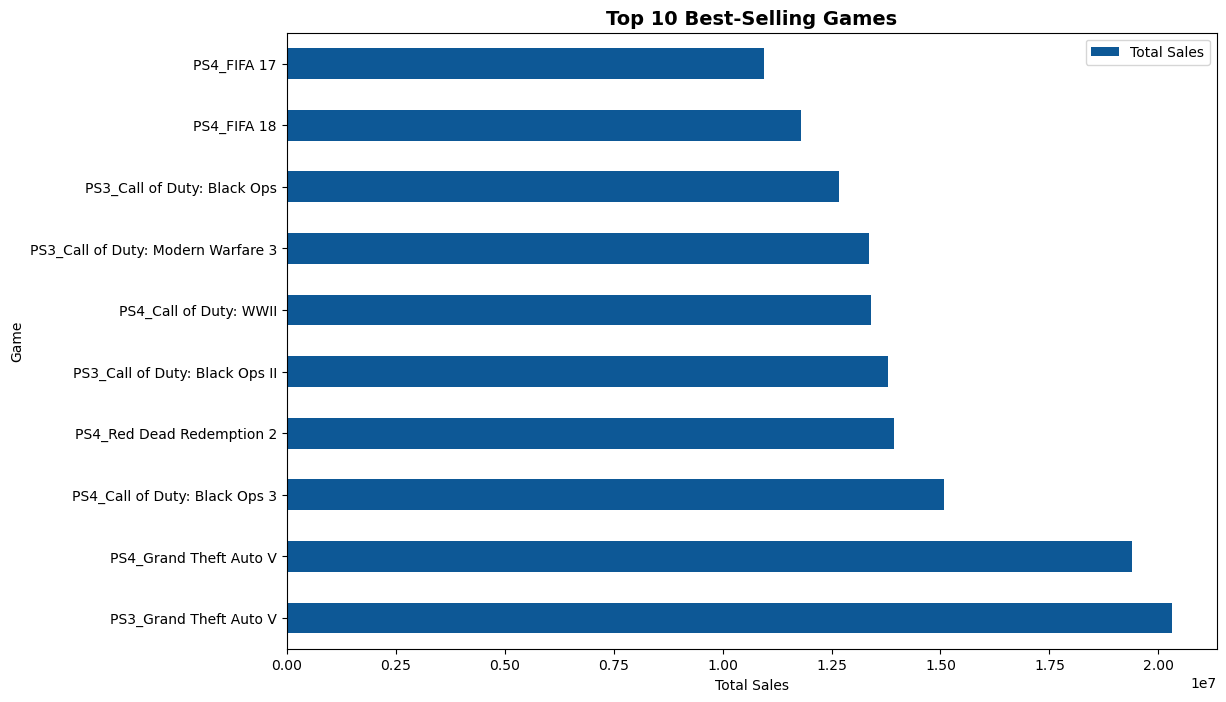

In [1102]:
max_games_sold.plot(x='Game', y='Total Sales', kind='barh', figsize=(12,8), color="#0d5896")
plt.title('Top 10 Best-Selling Games', fontsize=14, fontweight='bold')
plt.xlabel('Total Sales')
plt.savefig('outputs/q2_top_games.png', dpi=300, bbox_inches='tight')
plt.show()

3) What are the top 5 best games for each console?

In [1103]:
query_games_for_console = """
SELECT Console, Game, [Total Sales]
FROM(
    SELECT Console, Game, [Total Sales],
        ROW_NUMBER() OVER (PARTITION BY Console ORDER BY [Total Sales] DESC) as rank
    FROM PlayStation_Games)
WHERE rank <=5
ORDER BY Console, rank
"""
logger.info("Q3 interogation on the table from database")
best_games_for_console = pd.read_sql(query_games_for_console,conn)
logger.info("DONE! Q3 interogation on the table from database")
best_games_for_console

INFO:__main__:Q3 interogation on the table from database
INFO:__main__:DONE! Q3 interogation on the table from database


,Console,Game,Total Sales
0,PS3,PS3_Grand Theft Auto V,20320000.0
1,PS3,PS3_Call of Duty: Black Ops II,13800000.0
2,PS3,PS3_Call of Duty: Modern Warfare 3,13350000.0
3,PS3,PS3_Call of Duty: Black Ops,12670000.0
4,PS3,PS3_Call of Duty: Modern Warfare 2,10610000.0
5,PS4,PS4_Grand Theft Auto V,19390000.0
6,PS4,PS4_Call of Duty: Black Ops 3,15090000.0
7,PS4,PS4_Red Dead Redemption 2,13940000.0
8,PS4,PS4_Call of Duty: WWII,13400000.0
9,PS4,PS4_FIFA 18,11800000.0


4) What are the top 15 Publishers based on total sales?

In [1104]:
query_15_publishers = """
    SELECT Publisher, SUM([Total Sales]) as All_Sales
    FROM PlayStation_Games
    GROUP BY Publisher
    ORDER BY All_Sales DESC
    LIMIT 15
"""
logger.info("Q4 interogation on the table from database")
total_biggest_15_publishers = pd.read_sql(query_15_publishers,conn)
logger.info("Done! Q4 interogation on the table from database")
total_biggest_15_publishers

INFO:__main__:Q4 interogation on the table from database
INFO:__main__:Done! Q4 interogation on the table from database


,Publisher,All_Sales
0,Activision,205940000.0
1,Electronic Arts,153760000.0
2,EA Sports,129990000.0
3,Ubisoft,128370000.0
4,Sony Computer Entertainment,103700000.0
5,Rockstar Games,82280000.0
6,Square Enix,58150000.0
7,Sony Interactive Entertainment,57870000.0
8,Bethesda Softworks,53740000.0
9,Warner Bros. Interactive Entertainment,51850000.0


INFO:__main__:✓ Saved: outputs/q4_top_publishers.png


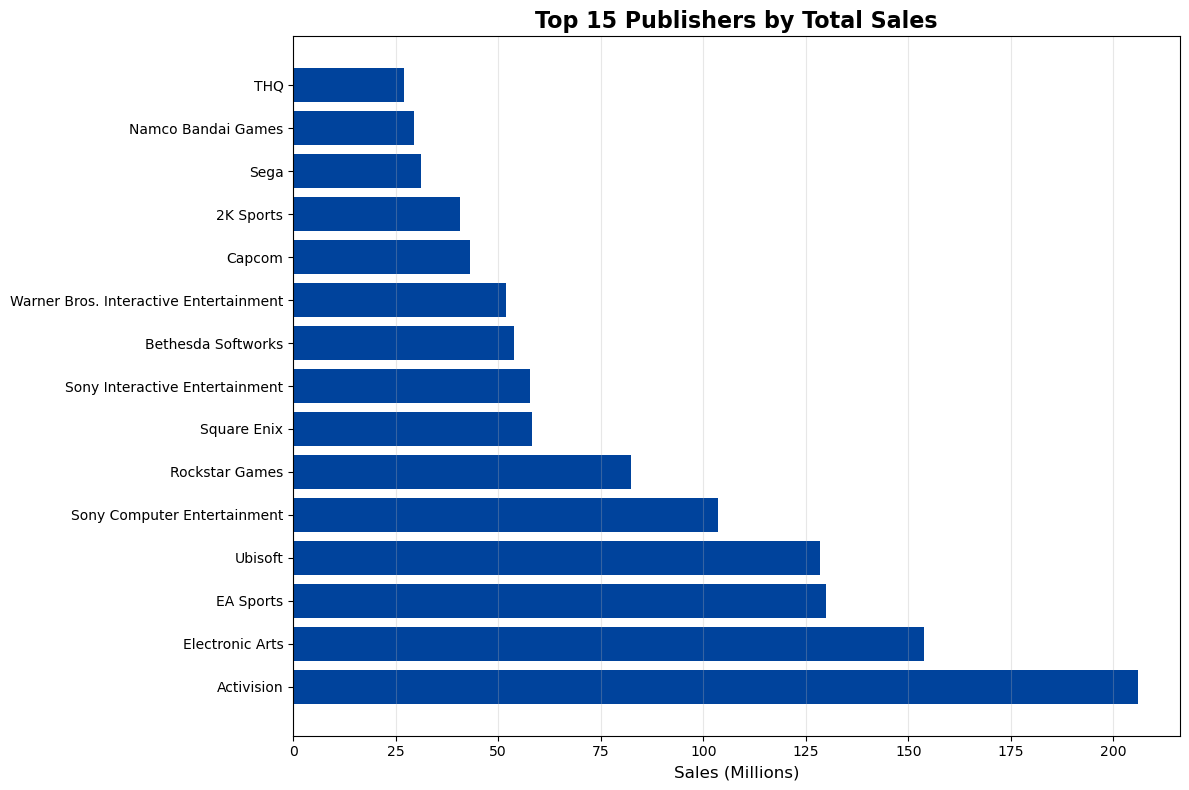

In [1105]:
plt.figure(figsize=(12, 8))
plt.barh(
    y=total_biggest_15_publishers['Publisher'],
    width=total_biggest_15_publishers['All_Sales'] / 1000000,
    color='#00439c'  # Different color
)

plt.title('Top 15 Publishers by Total Sales', fontsize=16, fontweight='bold')
plt.xlabel('Sales (Millions)', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

plt.savefig('outputs/q4_top_publishers.png', dpi=300, bbox_inches='tight')
logger.info("✓ Saved: outputs/q4_top_publishers.png")
plt.show()

5) What are the top 10 Developers based on average rating

In [1106]:
query_dev_top_10_devs = """
    SELECT Developer, AVG(rating) as average_rating
    FROM PlayStation_Games
    GROUP BY Developer
    ORDER BY average_rating DESC
    LIMIT 10    
"""
logger.info("Q5 interogation on the table from database")
top_10_devs_rating = pd.read_sql(query_dev_top_10_devs,conn)
logger.info("Done! Q5 interogation on the table from database")
top_10_devs_rating

INFO:__main__:Q5 interogation on the table from database
INFO:__main__:Done! Q5 interogation on the table from database


,Developer,average_rating
0,Valve Software,5.000000
1,Sandfall Interactive,5.000000
2,SIE Santa Monica Studio,5.000000
3,Edmund McMillen,5.000000
4,EA UK,5.000000
5,CD Projekt Red Studio,4.500000
6,Sucker Punch Productions,4.166667
7,à la mode games,4.000000
8,thatgamecompany,4.000000
9,tha ltd.,4.000000


6) What developers has the most games made

In [1107]:
query_dev_most_games = """
    SELECT Developer, COUNT(Game) as Nr_of_games  
    FROM PlayStation_Games
    GROUP BY DEVELOPER
    HAVING Developer != "Unknown"
    ORDER BY Nr_of_games DESC
    LIMIT 3  
"""
logger.info("Q6 interogation on the table from database")
dev_with_most_games = pd.read_sql(query_dev_most_games,conn)
logger.info("Done! Q6 interogation on the table from database")
dev_with_most_games

INFO:__main__:Q6 interogation on the table from database
INFO:__main__:Done! Q6 interogation on the table from database


,Developer,Nr_of_games
0,Capcom,82
1,Square Enix,67
2,Omega Force,55


7) How many games are in each genre?

In [1108]:
query_count_games_genre = """
    SELECT genres, COUNT(Game) as total_games
    FROM PlayStation_Games
    GROUP BY genres
    ORDER BY total_games DESC
"""
logger.info("Q7 interogation on the table from database")
count_games_per_genre = pd.read_sql(query_count_games_genre, conn)
logger.info("Done! Q7 interogation on the table from database")
count_games_per_genre

INFO:__main__:Q7 interogation on the table from database
INFO:__main__:Done! Q7 interogation on the table from database


,genres,total_games
0,"Adventure, Action",2393
1,Action,204
2,"Shooter, Action",203
3,Sports,156
4,"Action, RPG",129
...,...,...
358,"Action, Fighting, Simulation, Sports",1
359,"Action, Fighting, Arcade, Family, Platformer",1
360,"Action, Casual, Strategy, Simulation, Family, ...",1
361,"Action, Casual, Sports, Indie, Massively Multi...",1


8)Which genre have the biggest average rating

In [1109]:
query_biggest_avg_rating = """
    SELECT genres, AVG(rating) as avg_rating
    FROM PlayStation_Games
    GROUP BY genres
    ORDER BY avg_rating DESC
    LIMIT 1 
"""
logger.info("Q8 interogation on the table from database")
genre_biggest_avg_rating = pd.read_sql(query_biggest_avg_rating,conn)
logger.info("Done! Q8 interogation on the table from database")
genre_biggest_avg_rating

INFO:__main__:Q8 interogation on the table from database
INFO:__main__:Done! Q8 interogation on the table from database


,genres,avg_rating
0,"Shooter, Puzzle",5.0


9) How many games have been launched each year?

In [1110]:
query_games_each_year = """
    SELECT [Release Year], COUNT(Game) as Nr_of_games
    FROM PlayStation_Games
    GROUP BY [Release Year]
    ORDER BY Nr_of_games DESC
"""
logger.info("Q9 interogation on the table from database")
total_games_each_year = pd.read_sql(query_games_each_year,conn)
total_games_each_year["Release Year"]=total_games_each_year["Release Year"].astype("Int64")
logger.info("Done! Q9 interogation on the table from database")
total_games_each_year

INFO:__main__:Q9 interogation on the table from database
INFO:__main__:Done! Q9 interogation on the table from database


,Release Year,Nr_of_games
0,2022,929
1,2017,761
2,2011,425
3,2015,342
4,2014,342
5,2016,330
6,2018,303
7,2013,235
8,2012,201
9,2010,196


INFO:__main__:✓ Saved: outputs/q9_games_per_year.png


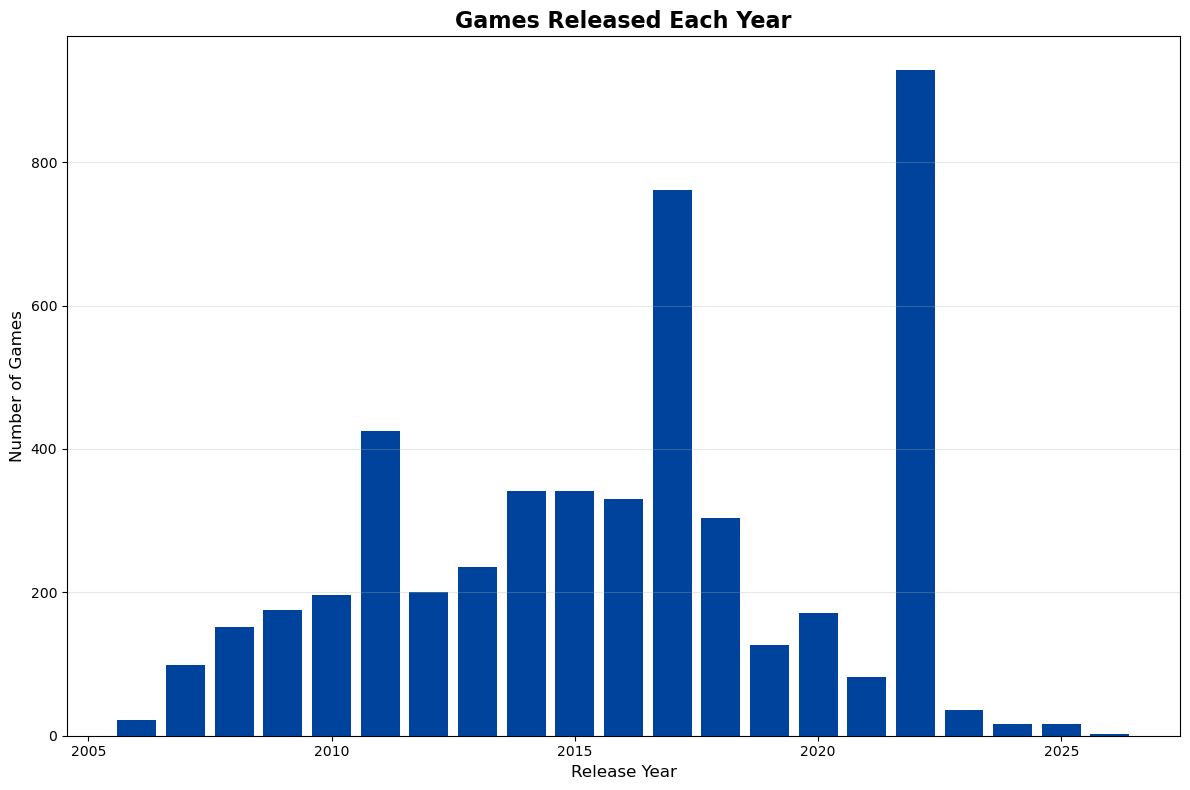

In [1111]:
plt.figure(figsize=(12, 8))
plt.bar(
    x=total_games_each_year["Release Year"],    
    height=total_games_each_year['Nr_of_games'], 
    color='#00439c'
)

plt.title('Games Released Each Year', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12) 
plt.ylabel('Number of Games', fontsize=12)  
plt.grid(axis='y', alpha=0.3)  
plt.tight_layout()

plt.savefig('outputs/q9_games_per_year.png', dpi=300, bbox_inches='tight')
logger.info("✓ Saved: outputs/q9_games_per_year.png")
plt.show()

The low number of games release in 2024,2025,2026 is because there are 0 sales registered for PS5

10) Which genre has the best average metacritic score?

In [1112]:
query_best_avg_metascore = """
    SELECT genres, AVG(metacritic) as avg_metacritic
    FROM PlayStation_Games
    GROUP BY genres
    ORDER BY avg_metacritic DESC
    LIMIT 1
"""
logger.info("Q10 interogation on the table from database")
best_avg_metascore = pd.read_sql(query_best_avg_metascore, conn)
logger.info("DONE! Q10 interogation on the table from database")
best_avg_metascore


INFO:__main__:Q10 interogation on the table from database
INFO:__main__:DONE! Q10 interogation on the table from database


,genres,avg_metacritic
0,"Shooter, Puzzle",95.0


Apparently "Shooter/Puzzle" has the best average rating and the best average metacritic score

11) In wich year where the most games sold?

In [1113]:
query_year_with_most_sales = """
    SELECT [Release year], SUM([Total Sales]) as all_sales
    FROM PlayStation_Games
    GROUP BY [Release Year]
    ORDER BY all_sales DESC
    
"""
logger.info("Q11 interogation on the table from database")
year_with_most_sale = pd.read_sql(query_year_with_most_sales, conn)
logger.info("DONE! Q11 interogation on the table from database")
year_with_most_sale


INFO:__main__:Q11 interogation on the table from database
INFO:__main__:DONE! Q11 interogation on the table from database


,Release Year,all_sales
0,2014.0,165170000.0
1,2011.0,156130000.0
2,2015.0,152640000.0
3,2016.0,137890000.0
4,2017.0,137570000.0
5,2013.0,122910000.0
6,2010.0,121990000.0
7,2018.0,109020000.0
8,2009.0,107790000.0
9,2012.0,105290000.0


INFO:__main__:✓ Saved: outputs/q9_most_sold_per_year.png


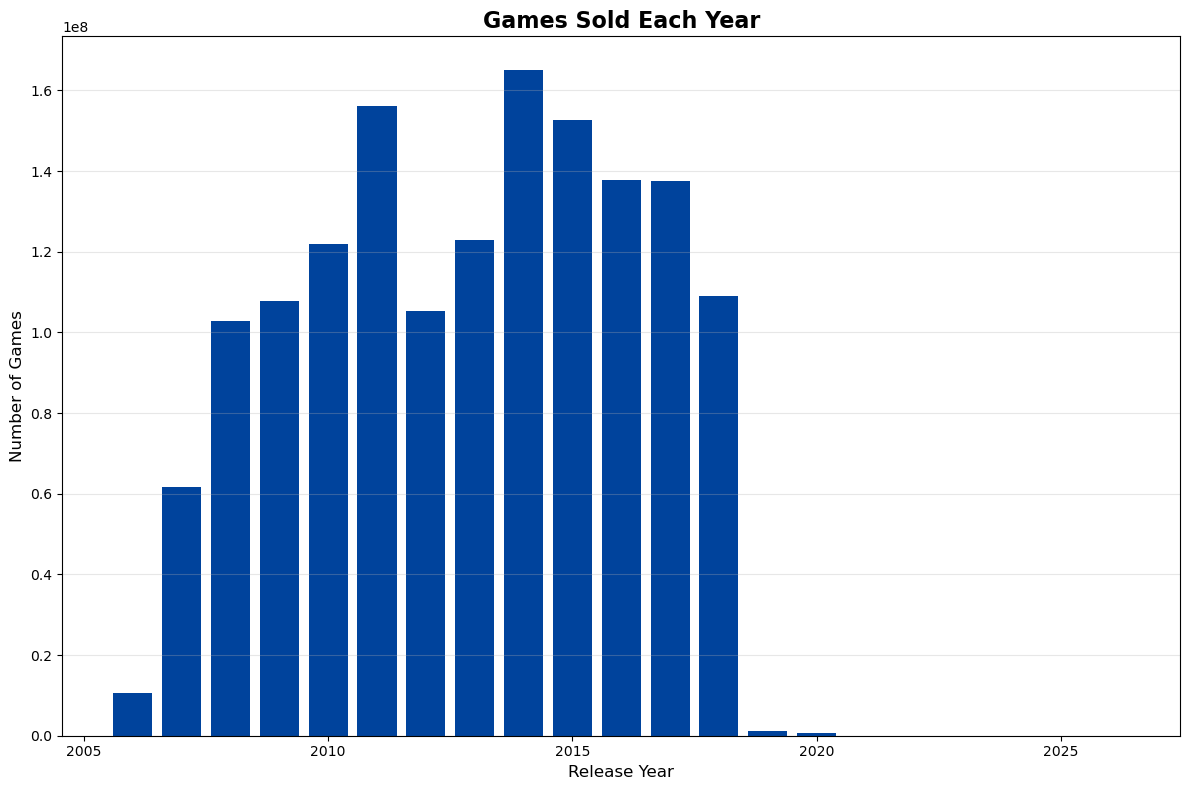

In [1114]:
plt.figure(figsize=(12, 8))
plt.bar(
    x=year_with_most_sale["Release Year"],    
    height=year_with_most_sale['all_sales'], 
    color='#00439c'
)

plt.title('Games Sold Each Year', fontsize=16, fontweight='bold')
plt.xlabel('Release Year', fontsize=12) 
plt.ylabel('Number of Games', fontsize=12)  
plt.grid(axis='y', alpha=0.3)  
plt.tight_layout()

plt.savefig('outputs/q11_most_sold_per_year.png', dpi=300, bbox_inches='tight')
logger.info("✓ Saved: outputs/q9_most_sold_per_year.png")
plt.show()

12) What where the top 5 games launched in 2020?

In [1115]:
query_top_five_games_2020 = """
    SELECT [Release year], Game, AVG(rating) as avg_rating
    FROM PlayStation_Games
    WHERE [Release Year] == 2020
    ORDER BY avg_rating DESC
    LIMIT 5
"""
logger.info("Q12 interogation on the table from database")
top_five_games_2020 = pd.read_sql(query_top_five_games_2020, conn)
logger.info("DONE! Q12 interogation on the table from database")
top_five_games_2020


INFO:__main__:Q12 interogation on the table from database
INFO:__main__:DONE! Q12 interogation on the table from database


,Release Year,Game,avg_rating
0,2020.0,PS3_Tokyo Jungle,3.187135


13) Which publisher has the most games with an average rating >= 4?

In [1116]:
query_publisher_big_avg = """
    SELECT Publisher, AVG(rating) as avg_rating, COUNT(Game) as nr_of_games
    FROM PlayStation_Games
    GROUP BY Publisher
    HAVING avg_rating >= 4
    ORDER BY nr_of_games DESC
    LIMIT 1
"""
logger.info("Q13 interogation on the table from database")
publisher_big_avg = pd.read_sql(query_publisher_big_avg, conn)
logger.info("DONE! Q13 interogation on the table from database")
publisher_big_avg



INFO:__main__:Q13 interogation on the table from database
INFO:__main__:DONE! Q13 interogation on the table from database


,Publisher,avg_rating,nr_of_games
0,Blizzard Entertainment,4.0,7


14) How many games have a rating >= 4 and sold more than 1 million copies?

In [1117]:
query_games_with_big_avg_and_copies = """
    with cte_games as (SELECT COUNT(Game) as Nr_of_Games, AVG(rating) as avg_rating, [Total Sales]
    FROM PlayStation_Games
    GROUP BY [Total Sales]
    HAVING avg_rating >=4 AND [Total Sales] > 1000000
    ORDER BY avg_rating)

    SELECT COUNT(Nr_of_Games) as total_nr_of_games
    FROM cte_games
"""
logger.info("Q14 interogation on the table from database")
games_with_big_avg_and_copies = pd.read_sql(query_games_with_big_avg_and_copies,conn)
logger.info("DONE! Q14 interogation on the table from database")
games_with_big_avg_and_copies


INFO:__main__:Q14 interogation on the table from database
INFO:__main__:DONE! Q14 interogation on the table from database


,total_nr_of_games
0,110


15) What is the average sale for games with a metacritic level smaller than 70?

In [1118]:
query_avg_sale_for_small_metacritic = """
    WITH cte_avg_metacricitc as(SELECT Game,  metacritic, [Total Sales]
    FROM PlayStation_Games
    GROUP BY Game
    HAVING metacritic < 70)

    SELECT AVG([Total Sales]) as avg_sales
    FROM cte_avg_metacricitc
"""
logger.info("Q15 interogation on the table from database")
avg_sale_for_small_metacritic = pd.read_sql(query_avg_sale_for_small_metacritic, conn)
logger.info("DONE! Q15 interogation on the table from database")
avg_sale_for_small_metacritic


INFO:__main__:Q15 interogation on the table from database
INFO:__main__:DONE! Q15 interogation on the table from database


,avg_sales
0,263752.808989


16) What % of sales for each region?

In [1119]:
query_percent_sales_region = """
   SELECT (SUM([NA Sales])/SUM([Total Sales]))*100 as na_pct, (SUM([PAL Sales])/SUM([Total Sales]))*100 as eu_pct, (SUM([Japan Sales])/SUM([Total Sales]))*100 as jpn_pct, (SUM([Other Sales])/SUM([Total Sales]))*100 as others_pct 
    FROM PlayStation_Games
"""
logger.info("Q16 interogation on the table from database")
percent_sales_region = pd.read_sql(query_percent_sales_region,conn)
logger.info("DONE! Q16 interogation on the table from database")
percent_sales_region


INFO:__main__:Q16 interogation on the table from database
INFO:__main__:DONE! Q16 interogation on the table from database


,na_pct,eu_pct,jpn_pct,others_pct
0,39.157046,38.900571,7.240913,14.710176


17) What Publisher has the biggest market share in the NA region?

In [1120]:
query_pub_market_share_NA = """
    SELECT Publisher, SUM([NA Sales]) as Total_sales, (SUM([NA Sales]) / (SELECT SUM([NA Sales]) FROM PlayStation_Games)) * 100 as Market_Share_NA
    FROM PlayStation_Games
    GROUP BY Publisher
    HAVING Market_Share_NA > 0
    ORDER BY Total_sales DESC
    LIMIT 10
"""
logger.info("Q17 interogation on the table from database")
pub_market_share_NA = pd.read_sql(query_pub_market_share_NA,conn)
logger.info("DONE! Q17 interogation on the table from database")
pub_market_share_NA


INFO:__main__:Q17 interogation on the table from database
INFO:__main__:DONE! Q17 interogation on the table from database


,Publisher,Total_sales,Market_Share_NA
0,Activision,89340000.0,15.278585
1,Electronic Arts,56070000.0,9.588877
2,EA Sports,49270000.0,8.425967
3,Ubisoft,46510000.0,7.953962
4,Sony Computer Entertainment,44590000.0,7.625611
5,Rockstar Games,30040000.0,5.137326
6,2K Sports,25640000.0,4.384855
7,Sony Interactive Entertainment,22310000.0,3.815371
8,Bethesda Softworks,21070000.0,3.603311
9,Warner Bros. Interactive Entertainment,19630000.0,3.357048


INFO:__main__:✓ Saved: outputs/q17_top_publishers_in_NA.png


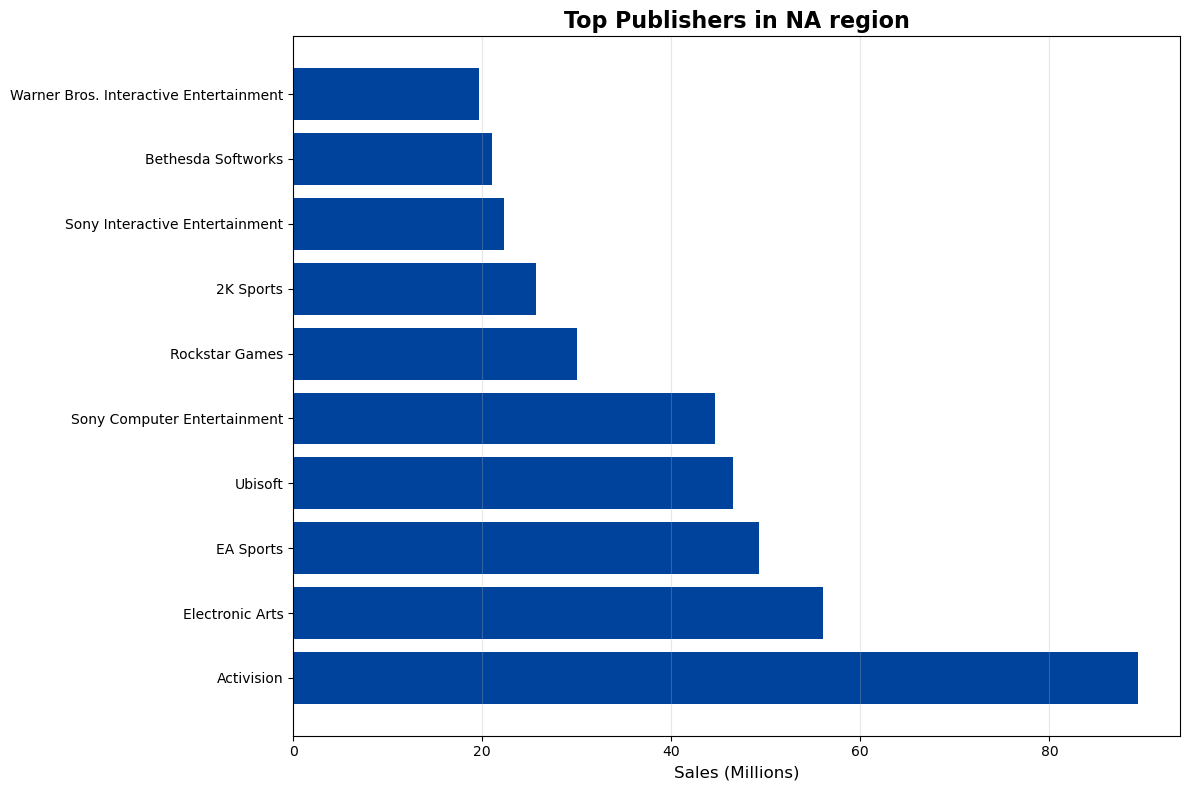

In [1121]:
plt.figure(figsize=(12, 8))
plt.barh(
    y=pub_market_share_NA['Publisher'],
    width=pub_market_share_NA['Total_sales'] / 1000000,
    color='#00439c'  # Different color
)

plt.title('Top Publishers in NA region', fontsize=16, fontweight='bold')
plt.xlabel('Sales (Millions)', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

plt.savefig('outputs/q17_top_publishers_in_NA.png', dpi=300, bbox_inches='tight')
logger.info("✓ Saved: outputs/q17_top_publishers_in_NA.png")
plt.show()

18) What Publisher has the biggest market share in the Japan region?

In [1122]:
query_pub_market_share_Japan = """
    SELECT Publisher, SUM([Japan Sales]) as Total_sales, (SUM([Japan Sales]) / (SELECT SUM([Japan Sales]) FROM PlayStation_Games)) * 100 as Market_Share_Japan
    FROM PlayStation_Games
    GROUP BY Publisher
    HAVING Market_Share_Japan > 0
    ORDER BY Total_sales DESC
"""
logger.info("Q18 interogation on the table from database")
pub_market_share_Japan = pd.read_sql(query_pub_market_share_Japan,conn)
logger.info("DONE! Q18 interogation on the table from database")
pub_market_share_Japan


INFO:__main__:Q18 interogation on the table from database
INFO:__main__:DONE! Q18 interogation on the table from database


,Publisher,Total_sales,Market_Share_Japan
0,Square Enix,11980000.0,11.079256
1,Capcom,11290000.0,10.441136
2,Namco Bandai Games,9370000.0,8.665495
3,Tecmo Koei,8600000.0,7.953389
4,Konami Digital Entertainment,5730000.0,5.299177
...,...,...,...
104,GungHo,10000.0,0.009248
105,FuRyu Corporation,10000.0,0.009248
106,El Dia,10000.0,0.009248
107,Disney Interactive Studios,10000.0,0.009248


19) What is the market share for each console?

In [1123]:
query_market_share_console = """
    SELECT Console, SUM([Total Sales]) as Total_Sales, (SUM([Total Sales])/(SELECT SUM([Total Sales]) FROM PlayStation_Games))*100 as share_Pct 
    FROM PlayStation_Games
    GROUP BY Console
    ORDER BY share_Pct DESC
"""
logger.info("Q19 interogation on the table from database")
market_share_console = pd.read_sql(query_market_share_console, conn)
logger.info("DONE! Q19 interogation on the table from database")
market_share_console


INFO:__main__:Q19 interogation on the table from database
INFO:__main__:DONE! Q19 interogation on the table from database


,Console,Total_Sales,share_Pct
0,PS3,839660000.0,56.227734
1,PS4,653660000.0,43.772266
2,PS5,0.0,0.000000


INFO:__main__:✓ Saved: outputs/q19_popularity_of_each_console.png


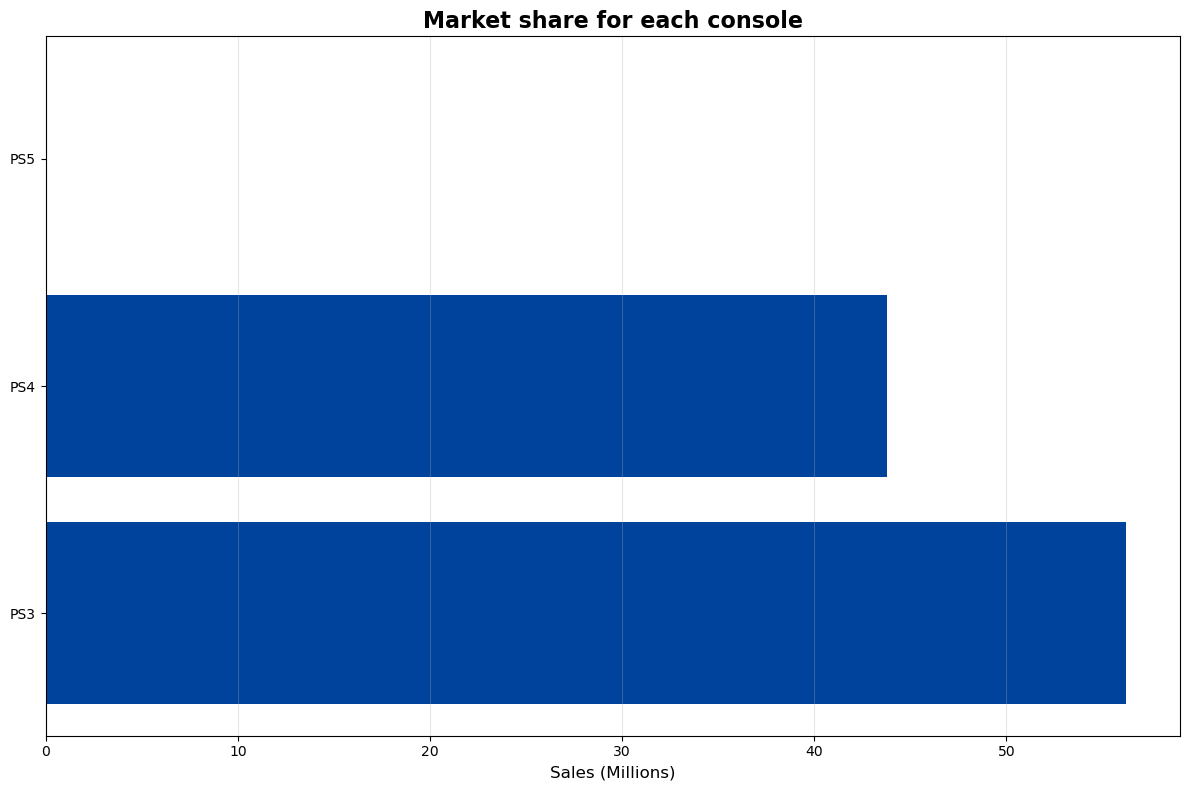

In [1124]:
plt.figure(figsize=(12, 8))
plt.barh(
    y=market_share_console['Console'],
    width=market_share_console['share_Pct'] ,
    color='#00439c'  # Different color
)

plt.title('Market share for each console', fontsize=16, fontweight='bold')
plt.xlabel('Sales (Millions)', fontsize=12)
plt.ylabel('')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()

plt.savefig('outputs/q19_popularity_of_each_console.png', dpi=300, bbox_inches='tight')
logger.info("✓ Saved: outputs/q19_popularity_of_each_console.png")
plt.show()

20) Which are the games with metacritic > 85 but with sales < 500K

In [1125]:
query_good_meta_small_sales = """
    SELECT Game, metacritic, [Total Sales]
    FROM PlayStation_Games
    WHERE metacritic > 85 AND [Total Sales] < 500000 
    ORDER BY [Total Sales] Desc
"""
logger.info("Q20 interogation on the table from database")
good_meta_small_sales = pd.read_sql(query_good_meta_small_sales,conn)
logger.info("DONE! Q20 interogation on the table from database")
good_meta_small_sales


INFO:__main__:Q20 interogation on the table from database
INFO:__main__:DONE! Q20 interogation on the table from database


,Game,metacritic,Total Sales
0,PS3_Destiny: The Taken King,88.0,430000.0
1,PS4_Okami HD,92.0,360000.0
2,PS4_Divinity: Original Sin,87.0,340000.0
3,PS3_NBA 2K17,90.0,340000.0
4,PS4_XCOM 2,88.0,310000.0
...,...,...,...
100,PS4_Cuphead,87.0,0.0
101,PS4_Death Road to Canada,91.0,0.0
102,PS4_Celeste,91.0,0.0
103,PS4_Chained Echoes,89.0,0.0


21) Which games have more succes in Japan Region than in NA Region?

In [1126]:
query_more_succes_jpn_NA = """
    SELECT Game, SUM([Japan Sales]) as japan_sales, SUM([NA Sales]) as na_sales
    FROM PlayStation_Games
    GROUP BY Game
    HAVING japan_sales > na_sales
    ORDER BY japan_sales DESC
"""
logger.info("Q21 interogation on the table from database")
more_succes_jpn_NA = pd.read_sql(query_more_succes_jpn_NA, conn)
logger.info("DONE! Q21 interogation on the table from database")
more_succes_jpn_NA


INFO:__main__:Q21 interogation on the table from database
INFO:__main__:DONE! Q21 interogation on the table from database


,Game,japan_sales,na_sales
0,PS4_Monster Hunter: World,2170000.0,1030000.0
1,PS3_Final Fantasy XIII,1870000.0,1750000.0
2,PS4_Dragon Quest XI: Echoes of an Elusive Age,1430000.0,290000.0
3,PS3_Final Fantasy XIII-2,890000.0,780000.0
4,PS3_Hot Shots Golf: Out of Bounds,760000.0,310000.0
...,...,...,...
547,PS3_Daikoukai Jidai Online: Cruz del Sur,10000.0,0.0
548,PS3_Burnout Paradise: The Ultimate Box,10000.0,0.0
549,PS3_Battle Fantasia,10000.0,0.0
550,PS3_Akatsuki no Goei Trinity,10000.0,0.0


22) Which publishers has games across all 3 consoles?

In [1127]:
query_pub_all_consoles = """
    SELECT Publisher, COUNT(DISTINCT Console) as nr_console
    FROM PlayStation_Games
    GROUP BY PUBLISHER
    HAVING nr_console = 3
"""
logger.info("Q22 interogation on the table from database")
pub_all_consoles = pd.read_sql(query_pub_all_consoles, conn)
logger.info("DONE! Q22 interogation on the table from database")
pub_all_consoles


INFO:__main__:Q22 interogation on the table from database
INFO:__main__:DONE! Q22 interogation on the table from database


,Publisher,nr_console
0,11 bit studios,3
1,2K Games,3
2,2K Sports,3
3,505 Games,3
4,Activision,3
5,Bethesda Softworks,3
6,Blizzard Entertainment,3
7,Capcom,3
8,Codemasters,3
9,D3 Publisher,3


23) How annual sales look for every console?

In [1128]:
query_annual_sales = """
    SELECT Console, SUM([Total Sales]) as total_sales, [Release Year]
    FROM PlayStation_Games
    GROUP BY [Release Year], Console
    ORDER BY Console
"""
logger.info("Q23 interogation on the table from database")
annual_sales = pd.read_sql(query_annual_sales, conn)
logger.info("DONE! Q23 interogation on the table from database")
annual_sales


INFO:__main__:Q23 interogation on the table from database
INFO:__main__:DONE! Q23 interogation on the table from database


,Console,total_sales,Release Year
0,PS3,10670000.0,2006.0
1,PS3,61570000.0,2007.0
2,PS3,102880000.0,2008.0
3,PS3,107790000.0,2009.0
4,PS3,121990000.0,2010.0
5,PS3,156130000.0,2011.0
6,PS3,105290000.0,2012.0
7,PS3,94150000.0,2013.0
8,PS3,50990000.0,2014.0
9,PS3,20030000.0,2015.0


24) How many games are launched every year and what is the average sale for those games?

In [1129]:
query_game_sale_year = """
    SELECT COUNT(*) as nr_games, AVG([Total Sales]) as avg_sales, [Release Year]
    FROM PlayStation_Games
    GROUP BY [Release Year]
    ORDER BY [Release Year]
"""
logger.info("Q24 interogation on the table from database")
game_sale_year = pd.read_sql(query_game_sale_year, conn)
logger.info("DONE! Q24 interogation on the table from database")
game_sale_year



INFO:__main__:Q24 interogation on the table from database
INFO:__main__:DONE! Q24 interogation on the table from database


,nr_games,avg_sales,Release Year
0,22,485000.000000,2006.0
1,98,628265.306122,2007.0
2,152,676842.105263,2008.0
3,175,615942.857143,2009.0
4,196,622397.959184,2010.0
5,425,367364.705882,2011.0
6,201,523830.845771,2012.0
7,235,523021.276596,2013.0
8,342,482953.216374,2014.0
9,342,446315.789474,2015.0


25) Which Publisher has a better average sale over the years?

In [1130]:
query_avg_pub_year = """
    SELECT Publisher, AVG([Total Sales]) as avg_sales, [Release Year] as year
    FROM PlayStation_Games
    GROUP BY Publisher, year
    ORDER BY year, Publisher
"""
logger.info("Q25 interogation on the table from database")
avg_pub_year = pd.read_sql(query_avg_pub_year,conn)
logger.info("DONE! Q25 interogation on the table from database")
avg_pub_year


INFO:__main__:Q25 interogation on the table from database
INFO:__main__:DONE! Q25 interogation on the table from database


,Publisher,avg_sales,year
0,2K Sports,255000.0,2006.0
1,Activision,840000.0,2006.0
2,EA Sports,900000.0,2006.0
3,Electronic Arts,1240000.0,2006.0
4,KOEI,10000.0,2006.0
...,...,...,...
1219,THQ Nordic,0.0,2025.0
1220,United Label,0.0,2025.0
1221,Xbox Game Studios,0.0,2025.0
1222,Playstack,0.0,2026.0


26) What is the life-cycle of each console? (sales per year from launch)

In [1131]:
query_life_cyle = """
    SELECT Console, [Release Year], AVG([Total Sales])
    FROM PlayStation_Games
    GROUP BY Console, [Release year]
    ORDER BY Console, [Release year]
"""
logger.info("Q26 interogation on the table from database")
life_cycle = pd.read_sql(query_life_cyle,conn)
logger.info("DONE! Q26 interogation on the table from database")
life_cycle


INFO:__main__:Q26 interogation on the table from database
INFO:__main__:DONE! Q26 interogation on the table from database


,Console,Release Year,AVG([Total Sales])
0,PS3,2006.0,485000.000000
1,PS3,2007.0,628265.306122
2,PS3,2008.0,676842.105263
3,PS3,2009.0,615942.857143
4,PS3,2010.0,622397.959184
5,PS3,2011.0,367364.705882
6,PS3,2012.0,523830.845771
7,PS3,2013.0,459268.292683
8,PS3,2014.0,249950.980392
9,PS3,2015.0,156484.375000


27) Which developer works with the most publishers?

In [1132]:
query_dev_work_publisher = """
    SELECT Developer, COUNT(DISTINCT Publisher) as nr_of_publishers
    FROM PlayStation_Games
    GROUP BY Developer
    HAVING Developer != "Unknown"
    ORDER BY nr_of_publishers DESC
    LIMIT 1
"""
logger.info("Q27 interogation on the table from database")
query_dev_work_publisher = pd.read_sql(query_dev_work_publisher, conn)
logger.info("DONE! Q27 interogation on the table from database")
query_dev_work_publisher


INFO:__main__:Q27 interogation on the table from database
INFO:__main__:DONE! Q27 interogation on the table from database


,Developer,nr_of_publishers
0,From Software,10


28) Which Publisher has the most diversity of genres in his portofolio 

In [1133]:
query_pub_divers_genre = """
    SELECT Publisher, COUNT(DISTINCT genres) as nr_genres
    FROM PlayStation_Games
    GROUP BY Publisher
    HAVING Publisher != "Unknown"
    ORDER BY nr_genres DESC
    LIMIT 1
"""
logger.info("Q28 interogation on the table from database")
pub_divers_genre = pd.read_sql(query_pub_divers_genre, conn)
logger.info("DONE! Q28 interogation on the table from database")
pub_divers_genre


INFO:__main__:Q28 interogation on the table from database
INFO:__main__:DONE! Q28 interogation on the table from database


,Publisher,nr_genres
0,Ubisoft,47


29) Which combination of genres + console has the most sales?

In [1134]:
query_genre_plus_console = """
    SELECT genres, Console, SUM([Total Sales]) as total_sales
    FROM PlayStation_Games
    GROUP BY genres, Console
    ORDER BY total_sales DESC
    LIMIT 1
"""
logger.info("Q29 interogation on the table from database")
genre_plus_console = pd.read_sql(query_genre_plus_console, conn)
logger.info("DONE! Q29 interogation on the table from database")
genre_plus_console


INFO:__main__:Q29 interogation on the table from database
INFO:__main__:DONE! Q29 interogation on the table from database


,genres,Console,total_sales
0,"Adventure, Action",PS3,218560000.0


30) Which combination of Publisher + genre is the most profitable?

In [1135]:
query_pub_plus_genre = """
    SELECT genres, Publisher, SUM([Total Sales]) as total_sales
    FROM PlayStation_Games
    GROUP BY Publisher, genres
    ORDER BY total_sales DESC
    LIMIT 1
"""
logger.info("Q30 interogation on the table from database")
pub_plus_genre = pd.read_sql(query_pub_plus_genre, conn)
logger.info("DONE! Q30 interogation on the table from database")
pub_plus_genre


INFO:__main__:Q30 interogation on the table from database
INFO:__main__:DONE! Q30 interogation on the table from database


,genres,Publisher,total_sales
0,"Shooter, Action",Activision,111360000.0


31) Which games are in top 10% sales overall?

In [1136]:
query_top_games = """
    SELECT Game, Console, [Total Sales]
    FROM PlayStation_Games
    ORDER BY [Total Sales] DESC
    LIMIT (SELECT COUNT(*) / 10 FROM PlayStation_Games)
"""
logger.info("Q31 interogation on the table from database")
top_games = pd.read_sql(query_top_games, conn)
logger.info("DONE! Q31 interogation on the table from database")
top_games


INFO:__main__:Q31 interogation on the table from database
INFO:__main__:DONE! Q31 interogation on the table from database


,Game,Console,Total Sales
0,PS3_Grand Theft Auto V,PS3,20320000.0
1,PS4_Grand Theft Auto V,PS4,19390000.0
2,PS4_Call of Duty: Black Ops 3,PS4,15090000.0
3,PS4_Red Dead Redemption 2,PS4,13940000.0
4,PS3_Call of Duty: Black Ops II,PS3,13800000.0
...,...,...,...
491,PS3_Ace Combat: Assault Horizon,PS3,740000.0
492,PS3_Marvel: Ultimate Alliance 2,PS3,740000.0
493,PS3_The Godfather II,PS3,740000.0
494,PS3_Resonance of Fate,PS3,740000.0


32) For each year, what where the top 3 games? (based on rating)

In [1137]:
query_top_games_every_year = """
    with cte_rank as(SELECT [Release Year] as Year, rating, Game,
        ROW_NUMBER() OVER(PARTITION BY [Release Year] ORDER BY rating DESC) as rank
    FROM PlayStation_Games)

    SELECT Year, Game, rating
    FROM cte_rank
    WHERE rank <=3
    ORDER BY Year

"""
logger.info("Q32 interogation on the table from database")
top_games_every_year = pd.read_sql(query_top_games_every_year, conn)
logger.info("DONE! Q32 interogation on the table from database")
top_games_every_year


INFO:__main__:Q32 interogation on the table from database
INFO:__main__:DONE! Q32 interogation on the table from database


,Year,Game,rating
0,2006.0,PS3_Fight Night Round 3,4.0
1,2006.0,PS3_Call of Duty 3,4.0
2,2006.0,PS3_Need for Speed Carbon,4.0
3,2007.0,PS3_The Orange Box,5.0
4,2007.0,PS3_Call of Duty 4: Modern Warfare,4.0
...,...,...,...
57,2025.0,PS5_Clair Obscur: Expedition 33,5.0
58,2025.0,PS5_Wreckfest 2,4.0
59,2025.0,PS5_The First Berserker: Khazan,4.0
60,2026.0,PS5_Grand Theft Auto VI,4.0


33) What is the peak year for each publisher? (sales based)

In [1138]:
query_peak_year_pub = """
   
    SELECT Publisher, [Total Sales], [Release Year]
    FROM (SELECT Publisher, [Total Sales], [Release Year],
            ROW_NUMBER() OVER(PARTITION BY Publisher ORDER BY [Total Sales] DESC) as rank
         FROM PlayStation_Games)
    WHERE rank = 1 and [Total Sales] != 0
    ORDER BY Publisher, [Total Sales] DESC
"""
logger.info("Q33 interogation on the table from database")
peak_year_pub = pd.read_sql(query_peak_year_pub,conn)
logger.info("DONE! Q33 interogation on the table from database")
peak_year_pub


INFO:__main__:Q33 interogation on the table from database
INFO:__main__:DONE! Q33 interogation on the table from database


,Publisher,Total Sales,Release Year
0,11 bit studios,30000.0,2016.0
1,2K Games,2870000.0,2016.0
2,2K Sports,3980000.0,2015.0
3,505 Games,2020000.0,2016.0
4,5pb,110000.0,2012.0
...,...,...,...
211,Wired Productions,30000.0,2017.0
212,Xseed Games,270000.0,2017.0
213,Yacht Club Games,140000.0,2015.0
214,Yeti,30000.0,2016.0


34) What is the efficiency for each publisher? (sales per game released)

In [1139]:
query_pub_efficiency = """
    SELECT Publisher, SUM([Total Sales]) all_sales, COUNT(Game) as nr_of_games, ((SUM([Total Sales])/COUNT(Game))*100) as efficiency_per_game
    FROM PlayStation_Games
    GROUP BY Publisher
    HAVING all_sales > 0
    ORDER BY efficiency_per_Game DESC
"""
logger.info("Q34 interogation on the table from database")
pub_efficiency = pd.read_sql(query_pub_efficiency, conn)
logger.info("DONE! Q34 interogation on the table from database")
pub_efficiency


INFO:__main__:Q34 interogation on the table from database
INFO:__main__:DONE! Q34 interogation on the table from database


,Publisher,all_sales,nr_of_games,efficiency_per_game
0,Rockstar Games,82280000.0,19,4.330526e+08
1,Hello Games,2260000.0,1,2.260000e+08
2,RedOctane,2250000.0,1,2.250000e+08
3,Valve,1710000.0,1,1.710000e+08
4,EA Sports,129990000.0,80,1.624875e+08
...,...,...,...,...
211,11 bit studios,30000.0,6,5.000000e+05
212,UIG Entertainment,10000.0,3,3.333333e+05
213,TopWare Interactive,10000.0,3,3.333333e+05
214,Kemco,10000.0,5,2.000000e+05


35) Market leader for each genre (Dominant Publisher)

In [1140]:
query_market_leader = """
    SELECT Publisher, genres, total_sales
    FROM (SELECT Publisher, genres, SUM([Total Sales]) as total_sales,
            RANK() OVER(PARTITION BY genres ORDER BY SUM([Total Sales]) DESC) as ranking
        FROM PlayStation_Games
        GROUP BY Publisher, genres
        HAVING total_sales > 0)
    WHERE ranking =1 
    ORDER BY total_sales DESC
"""
logger.info("Q35 interogation on the table from database")
market_leader = pd.read_sql(query_market_leader, conn)
logger.info("DONE! Q35 interogation on the table from database")
market_leader


INFO:__main__:Q35 interogation on the table from database
INFO:__main__:DONE! Q35 interogation on the table from database


,Publisher,genres,total_sales
0,Activision,"Shooter, Action",111360000.0
1,EA Sports,Sports,81410000.0
2,Rockstar Games,Action,66340000.0
3,Ubisoft,"Adventure, Action",62080000.0
4,Bethesda Softworks,"Action, RPG",20300000.0
...,...,...,...
214,Square Enix,"Casual, Strategy, Action, Puzzle",10000.0
215,Sony Interactive Entertainment,"Platformer, Action, Puzzle",10000.0
216,Team Meat,"Platformer, Indie",10000.0
217,U&I Entertainment,"Racing, Indie, Action",10000.0


In [1141]:
logger.info("Closing the connetion to the DB")
conn.close()
logger.info("DONE! Closing the connetion to the DB")

INFO:__main__:Closing the connetion to the DB
INFO:__main__:DONE! Closing the connetion to the DB
